In [109]:
import numpy as np               # Importing NumPy for numerical computations
import pandas as pd              # Importing Pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Importing Matplotlib for data visualization
import sklearn.datasets          # Importing sklearn.datasets for dataset loading
from sklearn.model_selection import train_test_split  # Importing train_test_split for data splitting

breast_cancer_dataset = sklearn.datasets.load_breast_cancer()  # Loading the breast cancer dataset

df = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)  # Creating a DataFrame with dataset features

df["label"] = breast_cancer_dataset.target  # Adding a new column "label" with dataset targets


In [110]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [111]:
# Check the distribution of target variable
df["label"].value_counts()

label
1    357
0    212
Name: count, dtype: int64

1-> Benign

0-> Malignat

Benign tumors are non-cancerous, while malignant tumors are cancerous

In [112]:
# separating the features and target

x=df.drop(columns="label",axis=1)
y=df["label"]

# splitting the data into training data and testing data

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=2)

**Standardise the Data**


- **fit_transform**: Think of it like learning and applying at the same time. When you have your training data, you want to learn from it (like figuring out the average and spread of each feature) and change the data accordingly (like scaling it) all in one go. That's what `fit_transform` does.

- **transform**: Now, let's say you've already learned from your training data and adjusted it accordingly. When you get new data (like your test data), you want to use the same adjustments you made to the training data without re-learning everything. That's what `transform` does. It applies the same changes to new data based on what it learned from the training data.

In [113]:
# transforming data into similar range

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train_std=scaler.fit_transform(x_train)

x_test_std=scaler.transform(x_test)

**Building the neural network**

In [114]:
# set_seed() ensures consistent random outcomes in TensorFlow for reproducibility and controlled experimentation.
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [115]:
# setting up the layers for neural network
# flatten layer reshapes multi-dimensional data into a one-dimensional (1D) vector.
# In Dense layer each neuron receives input from all the neurons of the previous layer
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)), #input_shape is number of feature/columns in data
    keras.layers.Dense(20,activation="relu"), # 20 = number of neurons can be set randomly with experimentation
    keras.layers.Dense(2,activation="sigmoid") # 2 = number of neurons = Number of classes/targets
])

In [116]:
# compiling the neural network

# Categorical Cross Entropy used with one_hot encoding
# Sparse Categorical Cross Entropy used with intiger like [0,1,2] 
model.compile(optimizer="adam", # optimizer is set randomly with experimentation
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]) # track the classification accuracy 


In [117]:
# training the neutral network

history=model.fit(x_train_std,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
 9/13 [===================>..........] - ETA: 0s - loss: 0.7679 - accuracy: 0.5104

2024-04-24 02:11:27.348295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 1s 25ms/step - loss: 0.7040 - accuracy: 0.5721 - val_loss: 0.4307 - val_accuracy: 0.8043
Epoch 2/10
 9/13 [===================>..........] - ETA: 0s - loss: 0.4028 - accuracy: 0.8438

2024-04-24 02:11:27.675158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 9ms/step - loss: 0.3859 - accuracy: 0.8411 - val_loss: 0.2467 - val_accuracy: 0.9348
Epoch 3/10
13/13 [==============================] - 0s 22ms/step - loss: 0.2596 - accuracy: 0.9022 - val_loss: 0.1826 - val_accuracy: 0.9565
Epoch 4/10
13/13 [==============================] - 0s 9ms/step - loss: 0.2075 - accuracy: 0.9218 - val_loss: 0.1501 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 9ms/step - loss: 0.1756 - accuracy: 0.9462 - val_loss: 0.1319 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 8ms/step - loss: 0.1556 - accuracy: 0.9511 - val_loss: 0.1186 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 8ms/step - loss: 0.1411 - accuracy: 0.9633 - val_loss: 0.1085 - val_accuracy: 0.9565
Epoch 8/10
13/13 [==============================] - 0s 9ms/step - loss: 0.1299 - accuracy: 0.9633 - val_loss: 0.1015 - val_accuracy: 0.9783
Epoch 9/10
13/13 [============

**visualising accuracy and loss**

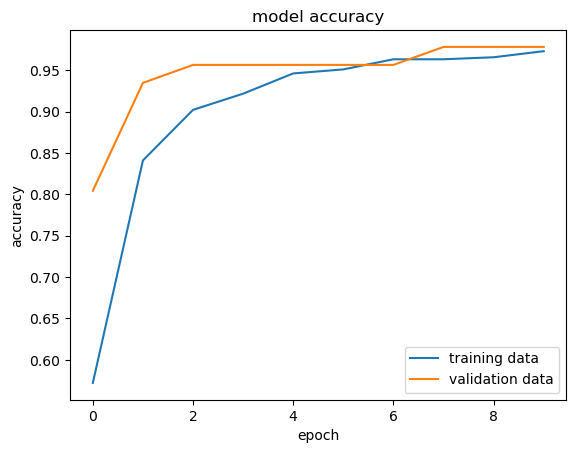

In [118]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")

plt.legend(["training data", "validation data"],loc="lower right")

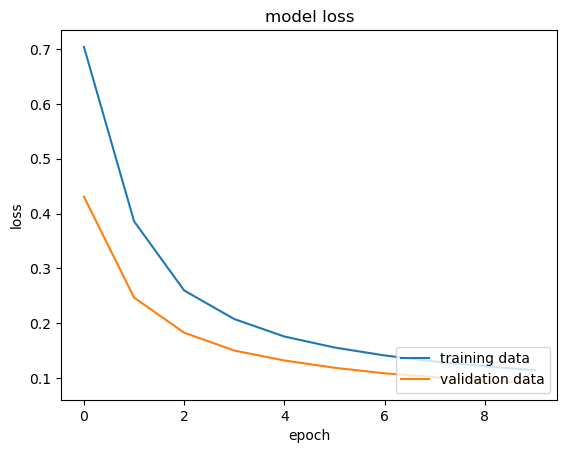

In [119]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")

plt.legend(["training data", "validation data"],loc="lower right")

**Accuracy of the model on data**

In [143]:
loss,accuracy=model.evaluate(x_test_std,y_test,)
print(accuracy)

4/4 [==============================] - 0s 6ms/step - loss: 0.1155 - accuracy: 0.9649
0.9649122953414917


In [144]:
print(x_test_std[0])

[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [145]:
y_pred=model.predict(x_test_std) #testing the test split data
print(y_pred[0])

4/4 [==============================] - 0s 2ms/step
[0.47850707 0.77971977]


-> Above output tell if 0.47850707 % chance of 0 & 0.77971977 % chance of 1

-> From this high accuracy is we choose the Maximun 

**Converting the production probability to class labels**

In [146]:
y_pred_label=[np.argmax(i) for i in y_pred] #argmax give the index of maximum value

In [147]:
print(y_pred_label)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [152]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# Change the input_data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

# Standardizing the input data
input_data_std=scaler.transform(input_data_reshaped)

prediction=model.predict(input_data_std)
print(prediction)

prediction_label=[np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0]==0):
    print("The tumour is malignant")
else:
    print("The tumour is Benign")

1/1 [==============================] - 0s 25ms/step
[[0.08937257 0.912131  ]]
[1]
The tumour is Benign


/Users/abhishek/tensorflow-test/env/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
